<a href="https://colab.research.google.com/github/oxygeniswonderful/Forecasting-epidemic/blob/main/Forecasting_epidemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.stats import zscore
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from scipy.spatial.distance import cdist
import math
from sklearn.neural_network import MLPRegressor

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_data_train.csv to covid_data_train.csv


In [ ]:
data = pd.read_csv("covid_data_train.csv")
data

Unnamed: 0        lat        lng             name  population  \
0             0  52.651055  90.101159            Абаза     17111.0   
1             1  53.720902  91.442435           Абакан    165183.0   
2             2  53.682800  53.655701         Абдулино     20663.0   
3             3  44.864953  38.157819           Абинск     34926.0   
4             4  56.525460  52.997251            Агрыз     19299.0   
..          ...        ...        ...              ...         ...   
446         446  57.880402  43.807240         Макарьев      7114.0   
447         447  55.208321  67.252739         Макушино      8337.0   
448         448  58.844215  32.218636     Малая Вишера     12461.0   
449         449  52.399578  36.504021  Малоархангельск      3872.0   
450         450  55.012181  36.459025    Малоярославец     30401.0   

            district               subject  density  ivl_per_100k  ivl_number  \
0          Сибирский               Хакасия     8.68           NaN         NaN   
1          Сибирский               Хакасия     8.68           NaN         NaN   
2        Приволжский  Оренбургская область    15.95          27.7       542.0   
3              Южный    Краснодарский край    73.73          17.6      1000.0   
4        Приволжский             Татарстан    57.27          28.2      1100.0   
..               ...                   ...      ...           ...         ...   
446      Центральный   Костромская область    10.70          19.1       121.0   
447        Уральский    Курганская область    11.91           NaN         NaN   
448  Северо-Западный  Новгородская область    10.97           NaN         NaN   
449      Центральный     Орловская область    30.25          21.8       160.0   
450      Центральный     Калужская область    33.85           4.8        48.0   

     ...  epirank_avia   epirank_bus  epirank_train  epirank_avia_cat  \
0    ...           NaN  2.278095e-11            NaN               NaN   
1    ...      0.000903  8.343086e-10       0.001383               0.0   
2    ...           NaN  5.164813e-14       0.000376               NaN   
3    ...           NaN  1.187676e-14       0.000186               NaN   
4    ...           NaN  4.750316e-13       0.001003               NaN   
..   ...           ...           ...            ...               ...   
446  ...           NaN  1.276106e-13            NaN               NaN   
447  ...           NaN           NaN       0.000050               NaN   
448  ...           NaN           NaN       0.000679               NaN   
449  ...           NaN  3.079256e-14       0.000019               NaN   
450  ...           NaN           NaN       0.000534               NaN   

     epirank_bus_cat  epirank_train_cat  whole_population     urban     rural  \
0                0.0                NaN           64241.0   44921.0   19320.0   
1                1.0                0.0           64241.0   44921.0   19320.0   
2                0.0                0.0          270081.0  156761.0  113320.0   
3                0.0                0.0          847286.0  452437.0  394849.0   
4                0.0                0.0          527462.0  371965.0  155497.0   
..               ...                ...               ...       ...       ...   
446              0.0                NaN           99956.0   68367.0   31589.0   
447              NaN                0.0          138138.0   81631.0   56507.0   
448              NaN                0.0          103185.0   66160.0   37025.0   
449              0.0                0.0          124919.0   80657.0   44262.0   
450              NaN                0.0          162749.0  121545.0   41204.0   

     has_metro  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
..         ...  
446        0.0  
447        0.0  
448        0.0  
449        0.0  
450        0.0  

[451 rows x 121 columns]

In [ ]:
#for col in data.columns: #посмотрим процент пропусков в каждом столбце
  #print(data[col].isnull().sum() * 100 / len(data), col)

In [ ]:
for col in data.columns:
    if data[col].isnull().sum() * 100 / len(data) > 27:
        print(col, data[col].isnull().sum() * 100 / len(data))
        del data[col]

ekmo_number 56.76274944567628
life_quality_place_rating 75.16629711751663
ecology 75.16629711751663
cleanness 75.16629711751663
public_services 75.16629711751663
neighbourhood 75.16629711751663
children_places 75.16629711751663
sport_and_outdoor 75.16629711751663
shops_and_malls 75.16629711751663
public_transport 75.16629711751663
security 75.16629711751663
life_costs 75.16629711751663
epirank_avia 89.3569844789357
epirank_train 38.80266075388027
epirank_avia_cat 89.3569844789357
epirank_train_cat 38.80266075388027


In [ ]:
data

Unnamed: 0        lat        lng             name  population  \
0             0  52.651055  90.101159            Абаза     17111.0   
1             1  53.720902  91.442435           Абакан    165183.0   
2             2  53.682800  53.655701         Абдулино     20663.0   
3             3  44.864953  38.157819           Абинск     34926.0   
4             4  56.525460  52.997251            Агрыз     19299.0   
..          ...        ...        ...              ...         ...   
446         446  57.880402  43.807240         Макарьев      7114.0   
447         447  55.208321  67.252739         Макушино      8337.0   
448         448  58.844215  32.218636     Малая Вишера     12461.0   
449         449  52.399578  36.504021  Малоархангельск      3872.0   
450         450  55.012181  36.459025    Малоярославец     30401.0   

            district               subject  density  ivl_per_100k  ivl_number  \
0          Сибирский               Хакасия     8.68           NaN         NaN   
1          Сибирский               Хакасия     8.68           NaN         NaN   
2        Приволжский  Оренбургская область    15.95          27.7       542.0   
3              Южный    Краснодарский край    73.73          17.6      1000.0   
4        Приволжский             Татарстан    57.27          28.2      1100.0   
..               ...                   ...      ...           ...         ...   
446      Центральный   Костромская область    10.70          19.1       121.0   
447        Уральский    Курганская область    11.91           NaN         NaN   
448  Северо-Западный  Новгородская область    10.97           NaN         NaN   
449      Центральный     Орловская область    30.25          21.8       160.0   
450      Центральный     Калужская область    33.85           4.8        48.0   

     ...  num_phones_rural_2018  num_phones_urban_2019  bus_march_travel_18  \
0    ...               53847.00               16199.99              21414.0   
1    ...               53847.00               16199.99              21414.0   
2    ...              306123.99              106326.00             135226.1   
3    ...              589577.99              315344.00             329792.1   
4    ...              647134.99              144303.99             157885.0   
..   ...                    ...                    ...                  ...   
446  ...              132135.00               30703.99              44207.8   
447  ...              103067.00               37022.99              36768.7   
448  ...              108212.00               22181.00              29494.0   
449  ...              100366.00               16747.00              36689.2   
450  ...              230581.00               22081.99              33148.6   

     bus_april_travel_18   epirank_bus  epirank_bus_cat  whole_population  \
0                22186.0  2.278095e-11              0.0           64241.0   
1                22186.0  8.343086e-10              1.0           64241.0   
2               133554.9  5.164813e-14              0.0          270081.0   
3               328273.8  1.187676e-14              0.0          847286.0   
4               162064.9  4.750316e-13              0.0          527462.0   
..                   ...           ...              ...               ...   
446              47905.6  1.276106e-13              0.0           99956.0   
447              37999.8           NaN              NaN          138138.0   
448              28061.6           NaN              NaN          103185.0   
449              37310.6  3.079256e-14              0.0          124919.0   
450              33891.8           NaN              NaN          162749.0   

        urban     rural  has_metro  
0     44921.0   19320.0        0.0  
1     44921.0   19320.0        0.0  
2    156761.0  113320.0        0.0  
3    452437.0  394849.0        0.0  
4    371965.0  155497.0        0.0  
..        ...       ...        ...  
446   68367.0   31589.0        0.0  
447   81631.0   56507

In [ ]:
def z_score_normalizaion(data):
  for column in data.columns:
    try:
      data[column] = zscore(data[column])
    except TypeError:
      continue
  return data

In [ ]:
def compute_correlation(data):
  #get correlations of each features in dataset
  corrmat = data.corr().abs()
  top_corr_features = corrmat.index
  plt.figure(figsize=(100,100))
  #plot heat map
  g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
  return corrmat

Unnamed: 0       lat       lng  population   density  \
Unnamed: 0          1.000000  0.088087  0.083306    0.048039  0.020251   
lat                 0.088087  1.000000  0.070460    0.035060  0.282378   
lng                 0.083306  0.070460  1.000000    0.071379  0.354770   
population          0.048039  0.035060  0.071379    1.000000  0.009798   
density             0.020251  0.282378  0.354770    0.009798  1.000000   
...                      ...       ...       ...         ...       ...   
epirank_bus_cat     0.053419  0.032209  0.469080    0.277137  0.180255   
whole_population    0.000085  0.191007  0.136040    0.034391  0.692026   
urban               0.017578  0.063429  0.097461    0.037249  0.670666   
rural               0.043269  0.454071  0.193888    0.017780  0.553093   
has_metro           0.001885  0.023713  0.010312    0.459865  0.016642   

                  ivl_per_100k  ivl_number  ekmo_per_100k  inf_rate  \
Unnamed: 0            0.049185    0.056300       0.057953  0.054476   
lat                   0.162763    0.115989       0.083652  0.136495   
lng                   0.294397    0.286693       0.160172  0.121375   
population            0.086243    0.104524       0.054956  0.002346   
density               0.405643    0.162595       0.433169  0.592569   
...                        ...         ...            ...       ...   
epirank_bus_cat       0.108306    0.095356       0.107071  0.094947   
whole_population      0.234025    0.353109       0.242189  0.692157   
urban                 0.233558    0.320793       0.296973  0.726733   
rural                 0.169103    0.332163       0.040353  0.414636   
has_metro             0.056056    0.124323       0.022005  0.061554   

                  avg_temp_min  ...  num_phones_rural_2018  \
Unnamed: 0            0.025393  ...               0.025907   
lat                   0.535834  ...               0.022677   
lng                   0.585988  ...               0.055877   
population            0.010590  ...               0.026515   
density               0.451456  ...               0.634261   
...                        ...  ...                    ...   
epirank_bus_cat       0.463072  ...               0.022069   
whole_population      0.249728  ...               0.920501   
urban                 0.145328  ...               0.967861   
rural                 0.439100  ...               0.548011   
has_metro             0.011090  ...               0.067932   

                  num_phones_urban_2019  bus_march_travel_18  \
Unnamed: 0                     0.049323             0.015810   
lat                            0.327724             0.135090   
lng                            0.088274             0.073381   
population                     0.015883             0.031426   
density                        0.385873             0.668548   
...                                 ...                  ...   
epirank_bus_cat                0.026442             0.010693   
whole_population               0.665692             0.895594   
urban                          0.494242             0.896726   
rural                          0.905834             0.644516   
has_metro                      0.014675             0.025638   

                  bus_april_travel_18  epirank_bus  epirank_bus_cat  \
Unnamed: 0                   0.017580     0.001832         0.053419   
lat                          0.129386     0.011361         0.032209   
lng                          0.082295     0.313880         0.469080   
population                   0.027876     0.370616         0.277137   
density                      0.680432     0.123439         0.180255   
...                               ...          ...              ...   
epirank_bus_cat              0.000444     0.845693         1.000000   
whole_population             0.894696     0.033406         0.044889   
urban                        0.898413     0.026371         0.033226   
rural                        0.637464     0.041280  

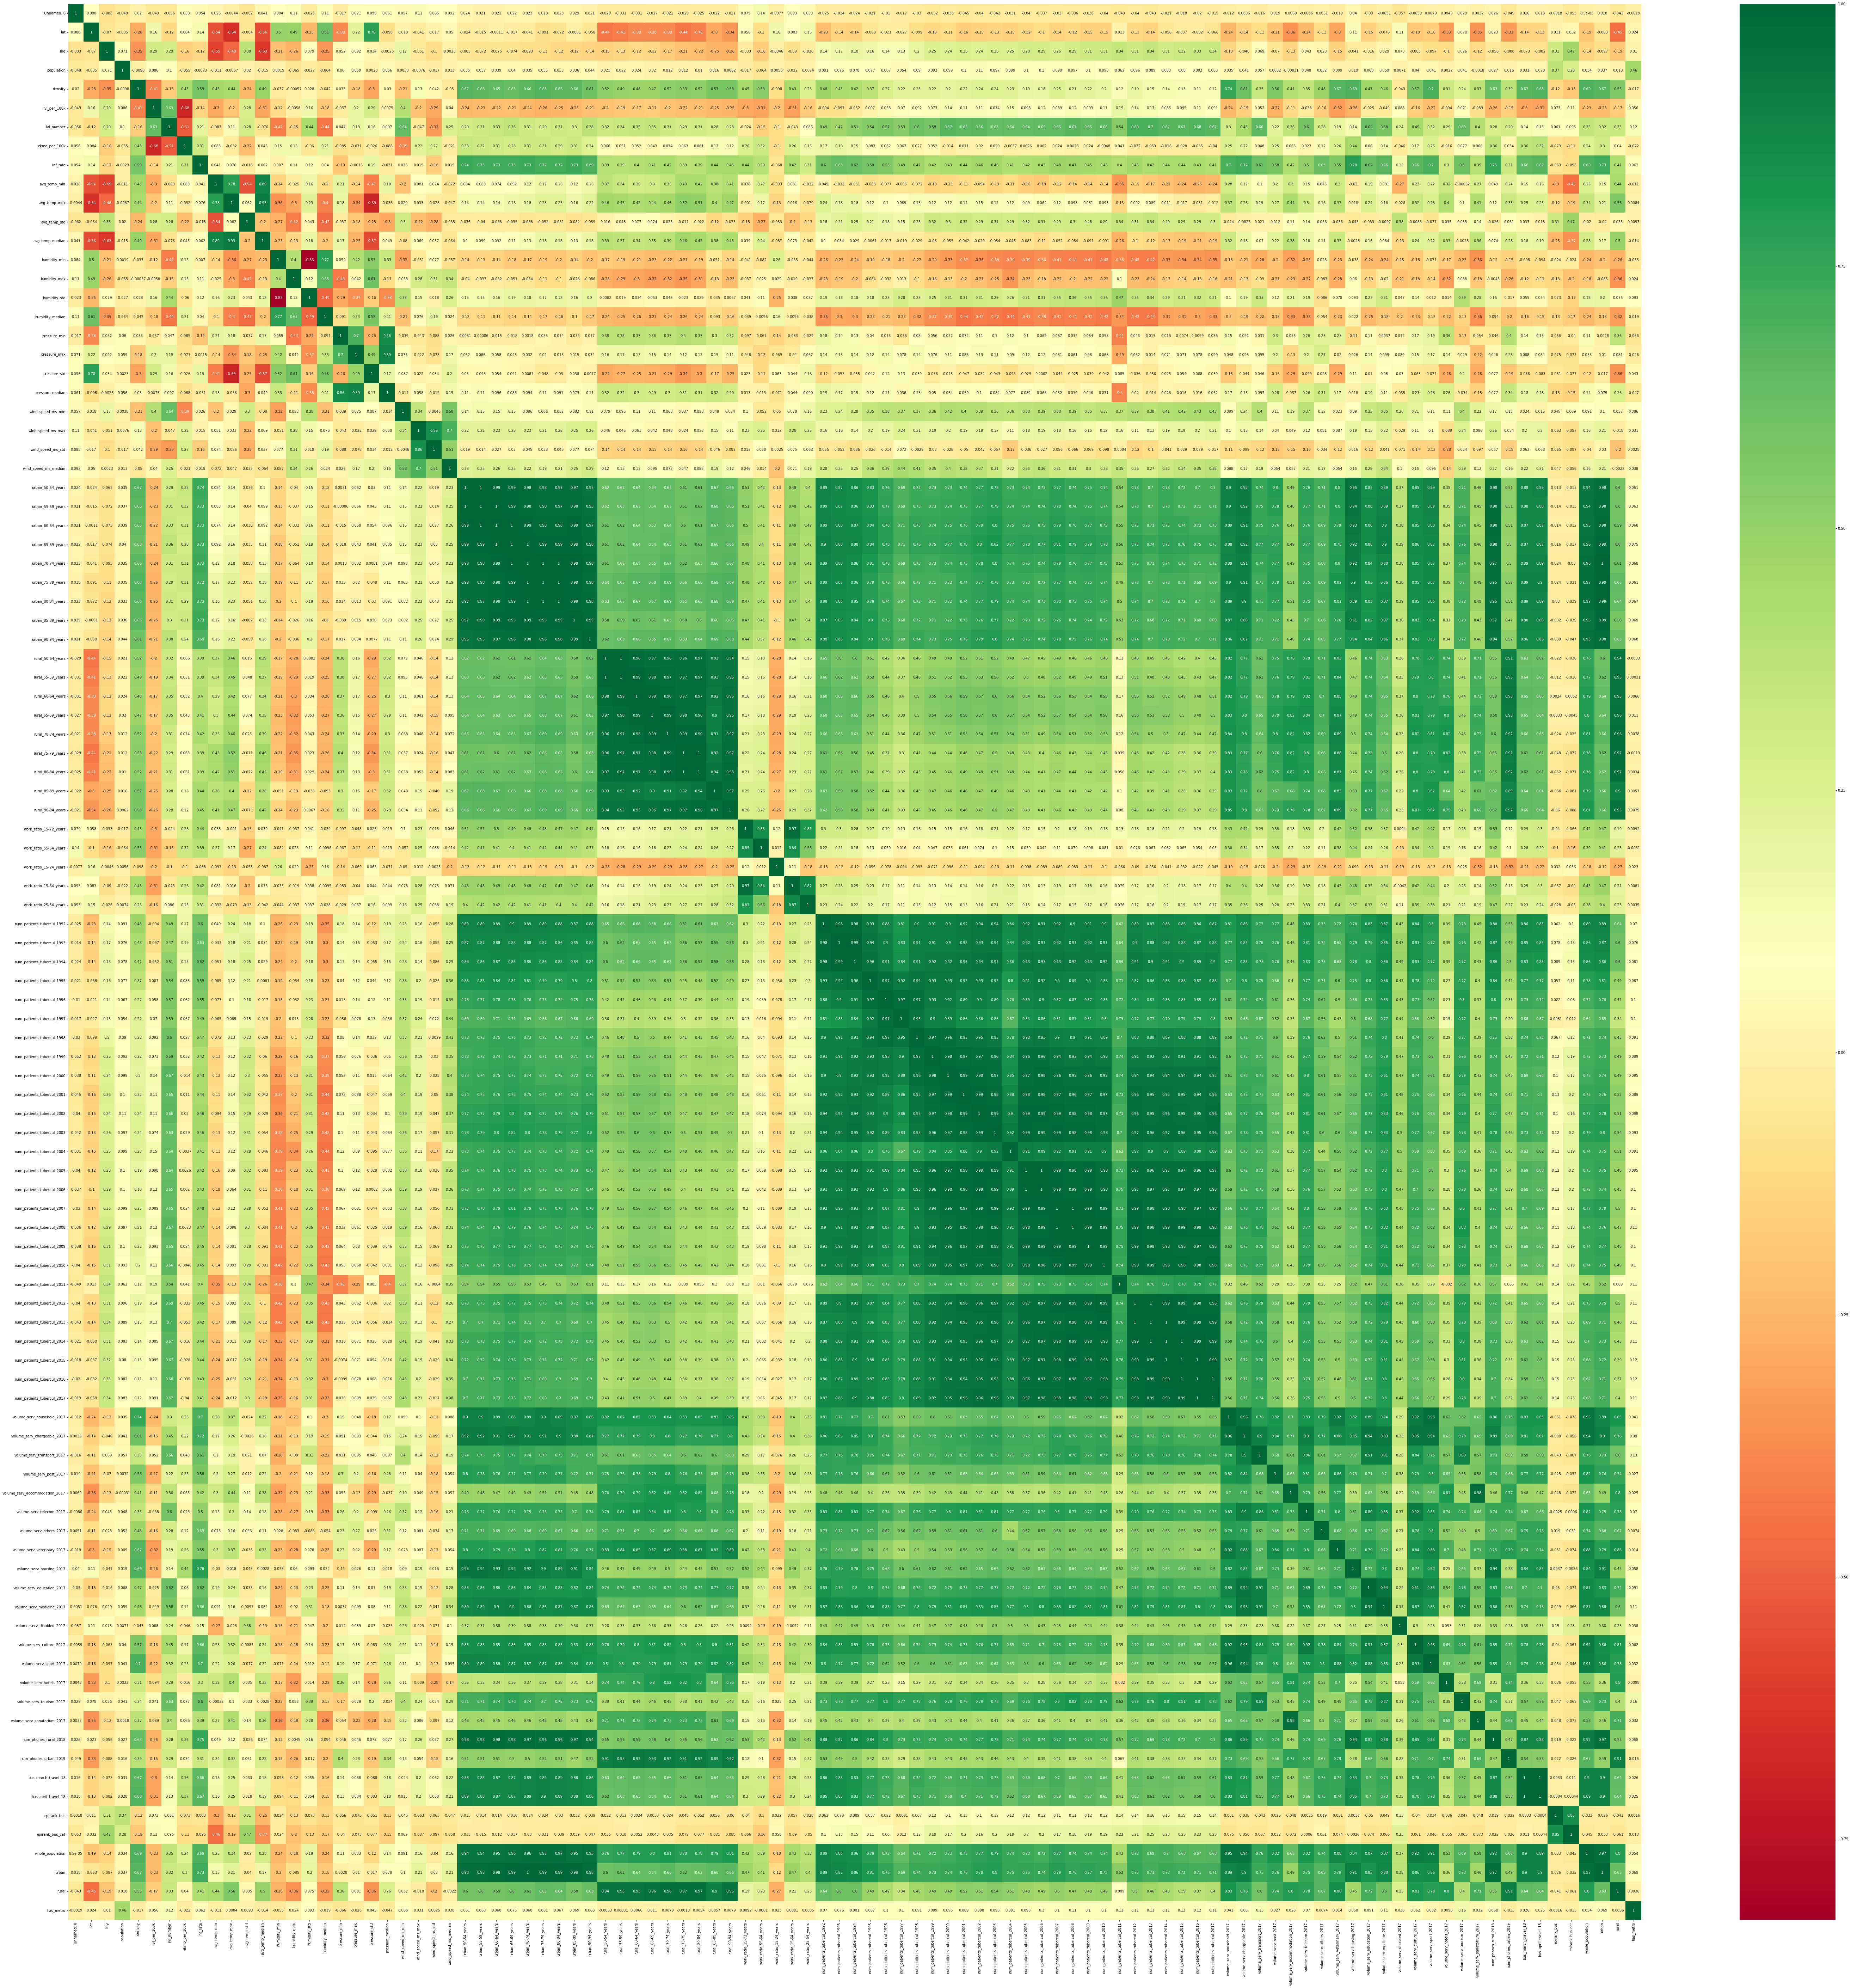

In [ ]:
cor_matrix = compute_correlation(data)
cor_matrix

In [ ]:
def reducing_dimension(cor_matrix, th=0.75):
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > th)]
  return to_drop

In [ ]:
to_drop = reducing_dimension(cor_matrix)
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['avg_temp_max',
 'avg_temp_median',
 'humidity_std',
 'humidity_median',
 'pressure_std',
 'pressure_median',
 'wind_speed_ms_std',
 'urban_55-59_years',
 'urban_60-64_years',
 'urban_65-69_years',
 'urban_70-74_years',
 'urban_75-79_years',
 'urban_80-84_years',
 'urban_85-89_years',
 'urban_90-94_years',
 'rural_55-59_years',
 'rural_60-64_years',
 'rural_65-69_years',
 'rural_70-74_years',
 'rural_75-79_years',
 'rural_80-84_years',
 'rural_85-89_years',
 'rural_90-94_years',
 'work_ratio_55-64_years',
 'work_ratio_15-64_years',
 'work_ratio_25-54_years',
 'num_patients_tubercul_1992',
 'num_patients_tubercul_1993',
 'num_patients_tubercul_1994',
 'num_patients_tubercul_1995',
 'num_patients_tubercul_1996',
 'num_patients_tubercul_1997',
 'num_patients_tubercul_1998',
 'num_patients_tubercul_1999',
 'num_patients_tubercul_2000',
 'num_patients_tubercul_2001',
 'num_patients_tubercul_2002',
 'num_patients_tubercul_2003',
 'num_patients_tubercul_2004',
 'num_patients_tubercul_2005',


In [ ]:
data = data.drop(to_drop, axis='columns')
data

Unnamed: 0        lat        lng             name  population  \
0             0  52.651055  90.101159            Абаза     17111.0   
1             1  53.720902  91.442435           Абакан    165183.0   
2             2  53.682800  53.655701         Абдулино     20663.0   
3             3  44.864953  38.157819           Абинск     34926.0   
4             4  56.525460  52.997251            Агрыз     19299.0   
..          ...        ...        ...              ...         ...   
446         446  57.880402  43.807240         Макарьев      7114.0   
447         447  55.208321  67.252739         Макушино      8337.0   
448         448  58.844215  32.218636     Малая Вишера     12461.0   
449         449  52.399578  36.504021  Малоархангельск      3872.0   
450         450  55.012181  36.459025    Малоярославец     30401.0   

            district               subject  density  ivl_per_100k  ivl_number  \
0          Сибирский               Хакасия     8.68           NaN         NaN   
1          Сибирский               Хакасия     8.68           NaN         NaN   
2        Приволжский  Оренбургская область    15.95          27.7       542.0   
3              Южный    Краснодарский край    73.73          17.6      1000.0   
4        Приволжский             Татарстан    57.27          28.2      1100.0   
..               ...                   ...      ...           ...         ...   
446      Центральный   Костромская область    10.70          19.1       121.0   
447        Уральский    Курганская область    11.91           NaN         NaN   
448  Северо-Западный  Новгородская область    10.97           NaN         NaN   
449      Центральный     Орловская область    30.25          21.8       160.0   
450      Центральный     Калужская область    33.85           4.8        48.0   

     ...  wind_speed_ms_max  wind_speed_ms_median              region_x  \
0    ...                9.0                   4.0    Республика Хакасия   
1    ...                9.0                   4.0    Республика Хакасия   
2    ...                5.0                   4.0  Оренбургская область   
3    ...                6.0                   3.0    Краснодарский край   
4    ...                7.0                   5.0  Республика Татарстан   
..   ...                ...                   ...                   ...   
446  ...                7.0                   4.0   Костромская область   
447  ...                6.0                   4.0    Курганская область   
448  ...                5.0                   3.0  Новгородская область   
449  ...                8.0                   5.0     Орловская область   
450  ...                8.0                   4.0     Калужская область   

     urban_50-54_years  rural_50-54_years  work_ratio_15-72_years  \
0             18725.00            9467.00                   56.00   
1             18725.00            9467.00                   56.00   
2             65561.00           54073.99                   57.90   
3            181771.00          154571.00                   64.59   
4            168745.99           68434.99                   67.59   
..                 ...                ...                     ...   
446           26630.99           12678.00                   60.80   
447           28495.00           20799.99                   54.80   
448           25057.00           10954.00                   61.80   
449           29207.00           17514.00                   58.80   
450           46828.00           15657.99                   67.70   

     work_ratio_15-24_years  volume_serv_disabled_2017   epirank_bus  \
0                     35.79                  178749.60  2.278095e-11   
1                     35.79                  178749.60  8.343086e-10   
2                     23.20                   58508.20  5.164813e-14   
3                     23.50                  351889.20  1.187676e-14   
4                     29.40                  177413.80  4.750316e-13   
..                      ...  

In [ ]:
rows_and_nan = np.array(data.isnull().sum(axis=1))
print(rows_and_nan)

[ 3  3  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0 23  0  0  0
  0  1  0  4  0  0  1  0  3  1  4  1  0  0  0  0  0  0  0 23  0 23  0  0
  0  1  0  1  3  1  0  0  0 22  1  0  4  1  0  0  0  0  0  1  1  1  0  0
 23  1  0  1  0  0  0 23  0  1 23  1  1  3  0  0  0  0  0  1  3  0  0  1
  0  1 22  0  3  0  0  0  1  0  1  3  0  1  1  0  3  0  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  1  0  4  1  0  3 23  0  3  0  0  0  3  0  0  3
  0  0  1  0  0  0  0  3  0  0  0  1  0  0  0  0  0  0  1  4  0  0  3  0
  0 23  0  0  3  0  1  1  4  0  1  0  0 23  4  0  1  0  0  1  0  1  3  3
  3  0  0  0  0  3  0  0  0  3  0  0  0  4  0  0  0  0  1  3  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  3  3  0  0 23 23  1  0  1  0  3  1  1
  3  3  3  3  0  0  1  0  0  0  0  0  1  0  0  1  3  0  0  1  0 23  0  1
  3  0  0  1  0  4  3  0  3  0  1  3  0  0  0  0  3  3  3  3  0  0  0  0
  3  1  1  0  0  0  1  0  4  0  0  0  0  3  0  0  1  0  0  1  1  1  0  0
  0  0  0  3  0  0  0  0 23  0  0  0  4  3  0  3  1

In [ ]:
index_to_drop = []
for i in range(len(rows_and_nan)):
  if rows_and_nan[i] > 20:
    index_to_drop.append(i)
print(index_to_drop)

[20, 43, 45, 57, 72, 79, 82, 98, 134, 169, 181, 231, 232, 261, 320, 355, 365, 378, 404, 406, 409, 412, 416, 437, 441]


In [ ]:
data = data.drop(data.index[index_to_drop])
data = data.reset_index()
del data['index']
del data['Unnamed: 0']
data

lat        lng             name  population         district  \
0    52.651055  90.101159            Абаза     17111.0        Сибирский   
1    53.720902  91.442435           Абакан    165183.0        Сибирский   
2    53.682800  53.655701         Абдулино     20663.0      Приволжский   
3    44.864953  38.157819           Абинск     34926.0            Южный   
4    56.525460  52.997251            Агрыз     19299.0      Приволжский   
..         ...        ...              ...         ...              ...   
421  57.880402  43.807240         Макарьев      7114.0      Центральный   
422  55.208321  67.252739         Макушино      8337.0        Уральский   
423  58.844215  32.218636     Малая Вишера     12461.0  Северо-Западный   
424  52.399578  36.504021  Малоархангельск      3872.0      Центральный   
425  55.012181  36.459025    Малоярославец     30401.0      Центральный   

                  subject  density  ivl_per_100k  ivl_number  ekmo_per_100k  \
0                 Хакасия     8.68           NaN         NaN            NaN   
1                 Хакасия     8.68           NaN         NaN            NaN   
2    Оренбургская область    15.95          27.7       542.0           0.05   
3      Краснодарский край    73.73          17.6      1000.0           0.07   
4               Татарстан    57.27          28.2      1100.0           0.00   
..                    ...      ...           ...         ...            ...   
421   Костромская область    10.70          19.1       121.0           0.00   
422    Курганская область    11.91           NaN         NaN            NaN   
423  Новгородская область    10.97           NaN         NaN            NaN   
424     Орловская область    30.25          21.8       160.0           0.00   
425     Калужская область    33.85           4.8        48.0           0.10   

     ...  wind_speed_ms_max  wind_speed_ms_median              region_x  \
0    ...                9.0                   4.0    Республика Хакасия   
1    ...                9.0                   4.0    Республика Хакасия   
2    ...                5.0                   4.0  Оренбургская область   
3    ...                6.0                   3.0    Краснодарский край   
4    ...                7.0                   5.0  Республика Татарстан   
..   ...                ...                   ...                   ...   
421  ...                7.0                   4.0   Костромская область   
422  ...                6.0                   4.0    Курганская область   
423  ...                5.0                   3.0  Новгородская область   
424  ...                8.0                   5.0     Орловская область   
425  ...                8.0                   4.0     Калужская область   

     urban_50-54_years  rural_50-54_years  work_ratio_15-72_years  \
0             18725.00            9467.00                   56.00   
1             18725.00            9467.00                   56.00   
2             65561.00           54073.99                   57.90   
3            181771.00          154571.00                   64.59   
4            168745.99           68434.99                   67.59   
..                 ...                ...                     ...   
421           26630.99           12678.00                   60.80   
422           28495.00           20799.99                   54.80   
423           25057.00           10954.00                   61.80   
424           29207.00           17514.00                   58.80   
425           46828.00           15657.99                   67.70   

     work_ratio_15-24_years  volume_serv_disabled_2017   epirank_bus  \
0                     35.79                  178749.60  2.278095e-11   
1                     35.79                  178749.60  8.343086e-10   
2                     23.20                   58508.20  5.164813e-14   
3                     23.50                  351889.20  1.187676e-14   
4                     29.40                  177413.80  4.750316e-13   

In [ ]:
data.fillna(data.mean(), inplace=True)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


lat        lng             name  population         district  \
0    52.651055  90.101159            Абаза     17111.0        Сибирский   
1    53.720902  91.442435           Абакан    165183.0        Сибирский   
2    53.682800  53.655701         Абдулино     20663.0      Приволжский   
3    44.864953  38.157819           Абинск     34926.0            Южный   
4    56.525460  52.997251            Агрыз     19299.0      Приволжский   
..         ...        ...              ...         ...              ...   
421  57.880402  43.807240         Макарьев      7114.0      Центральный   
422  55.208321  67.252739         Макушино      8337.0        Уральский   
423  58.844215  32.218636     Малая Вишера     12461.0  Северо-Западный   
424  52.399578  36.504021  Малоархангельск      3872.0      Центральный   
425  55.012181  36.459025    Малоярославец     30401.0      Центральный   

                  subject  density  ivl_per_100k   ivl_number  ekmo_per_100k  \
0                 Хакасия     8.68     21.882955   524.815426       0.190994   
1                 Хакасия     8.68     21.882955   524.815426       0.190994   
2    Оренбургская область    15.95     27.700000   542.000000       0.050000   
3      Краснодарский край    73.73     17.600000  1000.000000       0.070000   
4               Татарстан    57.27     28.200000  1100.000000       0.000000   
..                    ...      ...           ...          ...            ...   
421   Костромская область    10.70     19.100000   121.000000       0.000000   
422    Курганская область    11.91     21.882955   524.815426       0.190994   
423  Новгородская область    10.97     21.882955   524.815426       0.190994   
424     Орловская область    30.25     21.800000   160.000000       0.000000   
425     Калужская область    33.85      4.800000    48.000000       0.100000   

     ...  wind_speed_ms_max  wind_speed_ms_median              region_x  \
0    ...                9.0                   4.0    Республика Хакасия   
1    ...                9.0                   4.0    Республика Хакасия   
2    ...                5.0                   4.0  Оренбургская область   
3    ...                6.0                   3.0    Краснодарский край   
4    ...                7.0                   5.0  Республика Татарстан   
..   ...                ...                   ...                   ...   
421  ...                7.0                   4.0   Костромская область   
422  ...                6.0                   4.0    Курганская область   
423  ...                5.0                   3.0  Новгородская область   
424  ...                8.0                   5.0     Орловская область   
425  ...                8.0                   4.0     Калужская область   

     urban_50-54_years  rural_50-54_years  work_ratio_15-72_years  \
0             18725.00            9467.00                   56.00   
1             18725.00            9467.00                   56.00   
2             65561.00           54073.99                   57.90   
3            181771.00          154571.00                   64.59   
4            168745.99           68434.99                   67.59   
..                 ...                ...                     ...   
421           26630.99           12678.00                   60.80   
422           28495.00           20799.99                   54.80   
423           25057.00           10954.00                   61.80   
424           29207.00           17514.00                   58.80   
425           46828.00           15657.99                   67.70   

     work_ratio_15-24_years  volume_serv_disabled_2017   epirank_bus  \
0                     35.79                  178749.60  2.278095e-11   
1                     35.79                  178749.60  8.343086e-10   
2                     23.20                   58508.20  5.164813e-14   
3                     23.50                  351889.20  1.187676e-14   
4                     29.40                  177413.80  4.7

In [ ]:
y = data['inf_rate']
X = data.drop(['district', 'name', 'subject', 'inf_rate'], axis='columns')
X = z_score_normalizaion(X)
X

lat       lng  population   density  ivl_per_100k  ivl_number  \
0   -0.358129  1.379837   -0.375516 -0.722150 -3.129174e-16    0.000000   
1   -0.141765  1.432922    0.697063 -0.722150 -3.129174e-16    0.000000   
2   -0.149471 -0.062587   -0.349787 -0.518315  5.123561e-01    0.044695   
3   -1.932774 -0.675956   -0.246471  1.101711 -3.772358e-01    1.235900   
4    0.425423 -0.088647   -0.359667  0.640209  5.563953e-01    1.495988   
..        ...       ...         ...       ...           ...         ...   
421  0.699444 -0.452365   -0.447931 -0.665514 -2.451182e-01   -1.050277   
422  0.159047  0.475551   -0.439072 -0.631588 -3.129174e-16    0.000000   
423  0.894363 -0.911014   -0.409199 -0.657943 -3.129174e-16    0.000000   
424 -0.408987 -0.741409   -0.471415 -0.117374 -7.306504e-03   -0.948842   
425  0.119381 -0.743190   -0.279248 -0.016438 -1.504639e+00   -1.240141   

     ekmo_per_100k  avg_temp_min  avg_temp_std  humidity_min  ...  \
0     8.928133e-17     -1.266554      1.206908     -0.753960  ...   
1     8.928133e-17     -1.266554      1.206908     -0.753960  ...   
2    -4.535363e-01     -0.301274      0.680497      1.285913  ...   
3    -3.892023e-01      1.748650      0.338504     -0.780257  ...   
4    -6.143712e-01      0.489288     -1.203102      0.910245  ...   
..             ...           ...           ...           ...  ...   
421  -6.143712e-01      0.266132     -1.186401      0.615347  ...   
422   8.928133e-17     -0.697419      0.114666      0.560875  ...   
423   8.928133e-17      0.489288     -1.231466     -0.404590  ...   
424  -6.143712e-01      0.241913      0.284395     -0.472210  ...   
425  -2.927013e-01      0.191746     -0.367792      0.319509  ...   

     wind_speed_ms_max  wind_speed_ms_median              region_x  \
0             1.317851             -0.107852    Республика Хакасия   
1             1.317851             -0.107852    Республика Хакасия   
2            -1.437509             -0.107852  Оренбургская область   
3            -0.748669             -1.008736    Краснодарский край   
4            -0.059829              0.793032  Республика Татарстан   
..                 ...                   ...                   ...   
421          -0.059829             -0.107852   Костромская область   
422          -0.748669             -0.107852    Курганская область   
423          -1.437509             -1.008736  Новгородская область   
424           0.629011              0.793032     Орловская область   
425           0.629011             -0.107852     Калужская область   

     urban_50-54_years  rural_50-54_years  work_ratio_15-72_years  \
0            -1.100193          -0.994202               -1.839497   
1            -1.100193          -0.994202               -1.839497   
2            -0.504483           0.425397               -1.357508   
3             0.973599           3.623674                0.339602   
4             0.807933           0.882430                1.100637   
..                 ...                ...                     ...   
421          -0.999637          -0.892013               -0.621840   
422          -0.975928          -0.633534               -2.143911   
423          -1.019656          -0.946879               -0.368161   
424          -0.966872          -0.738110               -1.129197   
425          -0.742750          -0.797176                1.128542   

    work_ratio_15-24_years  volume_serv_disabled_2017   epirank_bus  has_metro  
0                 1.054602                  -0.734857 -1.196223e-01  -0.048507  
1                 1.054602                  -0.734857  1.771150e+00  -0.048507  
2                -0.789457                  -1.273070 -1.725791e-01  -0.048507  
3                -0.745516                   0.040136 -1.726718e-01  -0.048507  
4                 0.118658                  -0.740836 -1.715927e-01  -0.048507  
..                     ...                        ...           ...        ...  
421              -0.906633                 

In [ ]:
dum = pd.get_dummies(X['region_x'])
X = X.drop(['region_x'], axis='columns')
Xdum = pd.concat([X, dum], axis=1)
Xdum

lat       lng  population   density  ivl_per_100k  ivl_number  \
0   -0.358129  1.379837   -0.375516 -0.722150 -3.129174e-16    0.000000   
1   -0.141765  1.432922    0.697063 -0.722150 -3.129174e-16    0.000000   
2   -0.149471 -0.062587   -0.349787 -0.518315  5.123561e-01    0.044695   
3   -1.932774 -0.675956   -0.246471  1.101711 -3.772358e-01    1.235900   
4    0.425423 -0.088647   -0.359667  0.640209  5.563953e-01    1.495988   
..        ...       ...         ...       ...           ...         ...   
421  0.699444 -0.452365   -0.447931 -0.665514 -2.451182e-01   -1.050277   
422  0.159047  0.475551   -0.439072 -0.631588 -3.129174e-16    0.000000   
423  0.894363 -0.911014   -0.409199 -0.657943 -3.129174e-16    0.000000   
424 -0.408987 -0.741409   -0.471415 -0.117374 -7.306504e-03   -0.948842   
425  0.119381 -0.743190   -0.279248 -0.016438 -1.504639e+00   -1.240141   

     ekmo_per_100k  avg_temp_min  avg_temp_std  humidity_min  ...  \
0     8.928133e-17     -1.266554      1.206908     -0.753960  ...   
1     8.928133e-17     -1.266554      1.206908     -0.753960  ...   
2    -4.535363e-01     -0.301274      0.680497      1.285913  ...   
3    -3.892023e-01      1.748650      0.338504     -0.780257  ...   
4    -6.143712e-01      0.489288     -1.203102      0.910245  ...   
..             ...           ...           ...           ...  ...   
421  -6.143712e-01      0.266132     -1.186401      0.615347  ...   
422   8.928133e-17     -0.697419      0.114666      0.560875  ...   
423   8.928133e-17      0.489288     -1.231466     -0.404590  ...   
424  -6.143712e-01      0.241913      0.284395     -0.472210  ...   
425  -2.927013e-01      0.191746     -0.367792      0.319509  ...   

     Томская область  Тульская область  Тюменская область  \
0                  0                 0                  0   
1                  0                 0                  0   
2                  0                 0                  0   
3                  0                 0                  0   
4                  0                 0                  0   
..               ...               ...                ...   
421                0                 0                  0   
422                0                 0                  0   
423                0                 0                  0   
424                0                 0                  0   
425                0                 0                  0   

     Удмуртская Республика  Ульяновская область  Хабаровский край  \
0                        0                    0                 0   
1                        0                    0                 0   
2                        0                    0                 0   
3                        0                    0                 0   
4                        0                    0                 0   
..                     ...                  ...               ...   
421                      0                    0                 0   
422                      0                    0                 0   
423                      0                    0                 0   
424                      0                    0                 0   
425                      0                    0                 0   

     Ханты-Мансийский автономный округ — Югра  Челябинская область  \
0                                           0                    0   
1                                           0                    0   
2                                           0                    0   
3                                           0                    0   
4                                           0                    0   
..                                        ...                  ...   
421                                         0                    0   
422                                         0                    0   
423                                         0                    0   
424               

In [ ]:
del data['name']
del data['district']
del data['subject']

In [ ]:
y_target = data['inf_rate']
X_feat = data.loc[:, 'lat':'inf_rate']
X_ft = pd.DataFrame(columns=X_feat.columns, data=X_feat.values)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xdum, y, train_size = 0.8, random_state=42)

In [ ]:
MLP_Regressor_1 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)

MLP_Regressor_1.fit(X_train, Y_train)
Y_pred = MLP_Regressor_1.predict(X_test)
print("MSE =", mean_squared_error(Y_pred, Y_test))
print("MAPE =", mean_absolute_percentage_error(Y_pred, Y_test))

MSE = 0.07679045005949493
MAPE = 0.05721378182126715


In [ ]:
MLP_Regressor_2 = MLPRegressor(hidden_layer_sizes=(5), activation='relu', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)

MLP_Regressor_2.fit(X_train, Y_train)
Y_pred = MLP_Regressor_2.predict(X_test)
print("MSE =", mean_squared_error(Y_pred, Y_test))
print("MAPE =", mean_absolute_percentage_error(Y_pred, Y_test))

MSE = 0.07927991570708154
MAPE = 0.08008370756081518
